<a href="https://colab.research.google.com/github/belokonr/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Assignment%201/Econ_5200_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rashelle Belokon

1/25/2026

Homework 1: The Cost of Living Crisis

Phase 1: Prepare (Logic & Control Flow)

In [1]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Dunkin Medium Iced Coffee', 'Price_2016': 2.60, 'Price_2024': 3.49}
]

In [2]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Dunkin Medium Iced Coffee: 34.23% Inflation


Phase 2: Process (The API Pipeline)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='3e150c3fcd656c5656ed9c32d89a86b9')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA') # Added Rent
subscrip = fred.get_series('CUSR0000SERA02') # added subscriptions
food = fred.get_series('CUSR0000SEFV') # added take out




NameError: name 'cpi' is not defined

In [57]:
# 2. Combine into a DataFrame
df = pd.DataFrame({'CPI': official_cpi, 'Tuition': tuition, 'Rent': rent, 'Subscription': subscrip, 'Food': food})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())


              CPI  Tuition   Rent  Subscription   Food
1992-01-01  138.3    200.7  145.4         180.8  139.8
1992-02-01  138.6    201.9  145.7         181.8  140.0
1992-03-01  139.1    203.5  146.5         183.3  140.1
1992-04-01  139.4    205.0  146.2         186.2  140.2
1992-05-01  139.7    206.3  146.5         185.2  140.4
                CPI  Tuition     Rent  Subscription     Food
2025-07-01  322.132  893.568  436.152       594.484  383.808
2025-08-01  323.364  895.305  437.462       592.604  384.909
2025-09-01  324.368  897.302  438.322       593.928  385.451
2025-11-01  325.031  902.001  438.875       599.226  387.202
2025-12-01  326.030  903.402  440.034       605.825  389.889


In [58]:
#find base values from 2016
df.index.name = 'Date'

result_row = df.loc['2016-01-01']

result_row

,2016-01-01
CPI,237.652
Tuition,699.997
Rent,291.700
Subscription,427.538
Food,259.958


In [59]:

df['CPI'] = (df['CPI'] / 237.652) * 100

df['Tuition'] = (df['Tuition'] / 699.997) * 100

df['Rent'] = (df['Rent'] / 291.7) * 100

df['Subscription'] = (df['Subscription'] / 427.538) * 100

df['Food'] = (df['Food'] / 259.958) * 100

# Check the result
print(df.tail())

result_row = df.loc['2016-01-01']

result_row


                   CPI     Tuition        Rent  Subscription        Food
Date                                                                    
2025-07-01  135.547776  127.653119  149.520740    139.048225  147.642311
2025-08-01  136.066181  127.901262  149.969832    138.608498  148.065841
2025-09-01  136.488647  128.186549  150.264655    138.918178  148.274337
2025-11-01  136.767627  128.857838  150.454234    140.157366  148.947907
2025-12-01  137.187989  129.057982  150.851560    141.700855  149.981535


,2016-01-01
CPI,100.0
Tuition,100.0
Rent,100.0
Subscription,100.0
Food,100.0


Phase 3: Analyze (The Index Theory & Visualization)

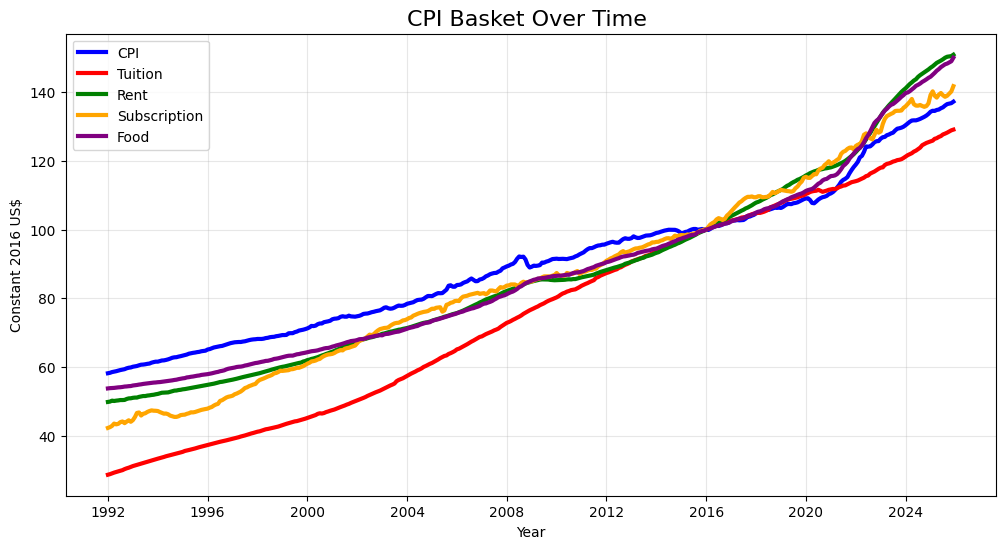

In [62]:

plt.figure(figsize=(12, 6))

# the index for our df is year
plt.plot(df.index, df['CPI'], label='CPI', color='blue', linewidth=3)
plt.plot(df.index, df['Tuition'], label='Tuition', color='red', linewidth=3)
plt.plot(df.index, df['Rent'], label='Rent', color='green', linewidth=3)
plt.plot(df.index, df['Subscription'], label='Subscription', color='orange', linewidth=3)
plt.plot(df.index, df['Food'], label='Food', color='purple', linewidth=3)
plt.title('CPI Basket Over Time ', fontsize=16)
plt.ylabel('Constant 2016 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [64]:
weight_dict = {'tuit': 0.4, 'rent': 0.3, 'subs': 0.05, 'food': 0.2}

df['Student_SPI'] = df['Tuition'] * weight_dict['tuit'] + df['Rent'] * weight_dict['rent'] + df['Subscription'] * weight_dict['subs'] + df['Food'] * weight_dict['food']

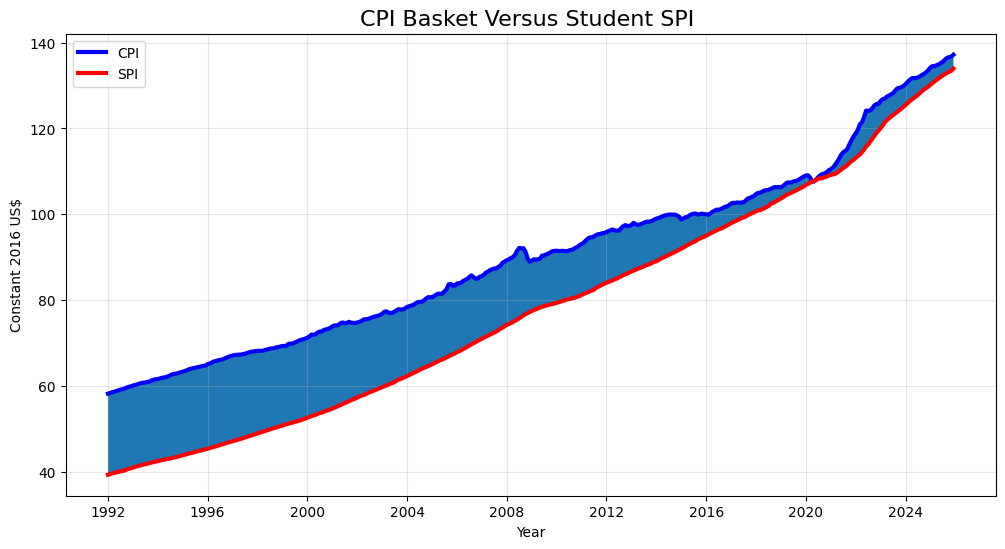

In [66]:
plt.figure(figsize=(12, 6))

# the index for our df is year
plt.plot(df.index, df['CPI'], label='CPI', color='blue', linewidth=3)
plt.plot(df.index, df['Student_SPI'], label='SPI', color='red', linewidth=3)
plt.title('CPI Basket Versus Student SPI ', fontsize=16)
plt.fill_between(df.index, df['CPI'], df['Student_SPI'])
plt.ylabel('Constant 2016 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [67]:
# redo df creation
df = pd.DataFrame({'CPI': official_cpi, 'Tuition': tuition, 'Rent': rent, 'Subscription': subscrip, 'Food': food})

df = df.dropna()

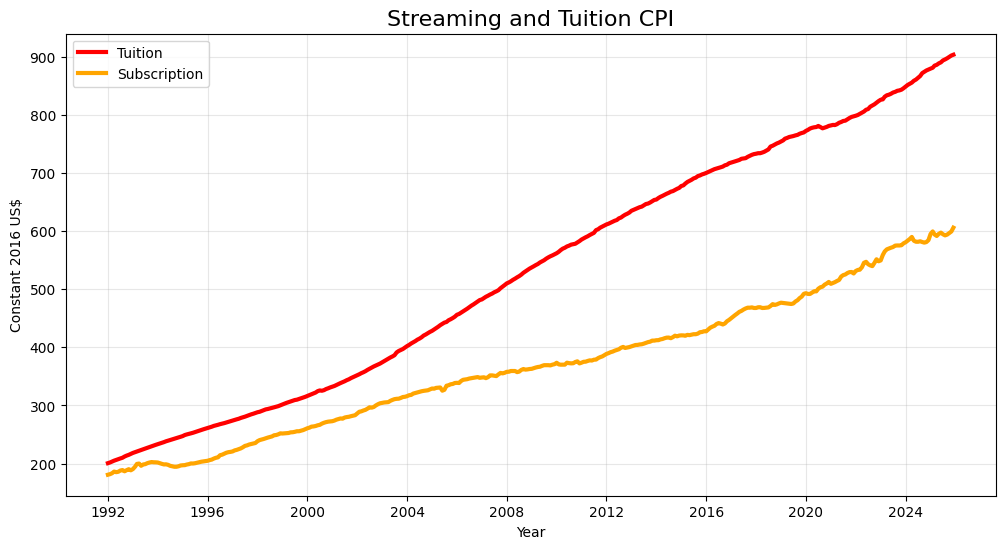

In [68]:

plt.figure(figsize=(12, 6))

# the index for our df is year
plt.plot(df.index, df['Tuition'], label='Tuition', color='red', linewidth=3)
plt.plot(df.index, df['Subscription'], label='Subscription', color='orange', linewidth=3)
plt.title('Streaming and Tuition CPI', fontsize=16)
plt.ylabel('Constant 2016 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

DELIVERABLE

Phase 4: AI Expansion (The Co-Pilot Era)

In [77]:
# redo df creation
df = pd.DataFrame({'CPI': official_cpi, 'Tuition': tuition, 'Rent': rent, 'Subscription': subscrip, 'Food': food})

df = df.dropna()

df['CPI'] = (df['CPI'] / 237.652) * 100

df['Tuition'] = (df['Tuition'] / 699.997) * 100

df['Rent'] = (df['Rent'] / 291.7) * 100

df['Subscription'] = (df['Subscription'] / 427.538) * 100

df['Food'] = (df['Food'] / 259.958) * 10

df['Student_SPI'] = df['Tuition'] * weight_dict['tuit'] + df['Rent'] * weight_dict['rent'] + df['Subscription'] * weight_dict['subs'] + df['Food'] * weight_dict['food']

/tmp/ipython-input-806997578.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Boston_CPI'] = df['Boston_CPI'].fillna(method='ffill')


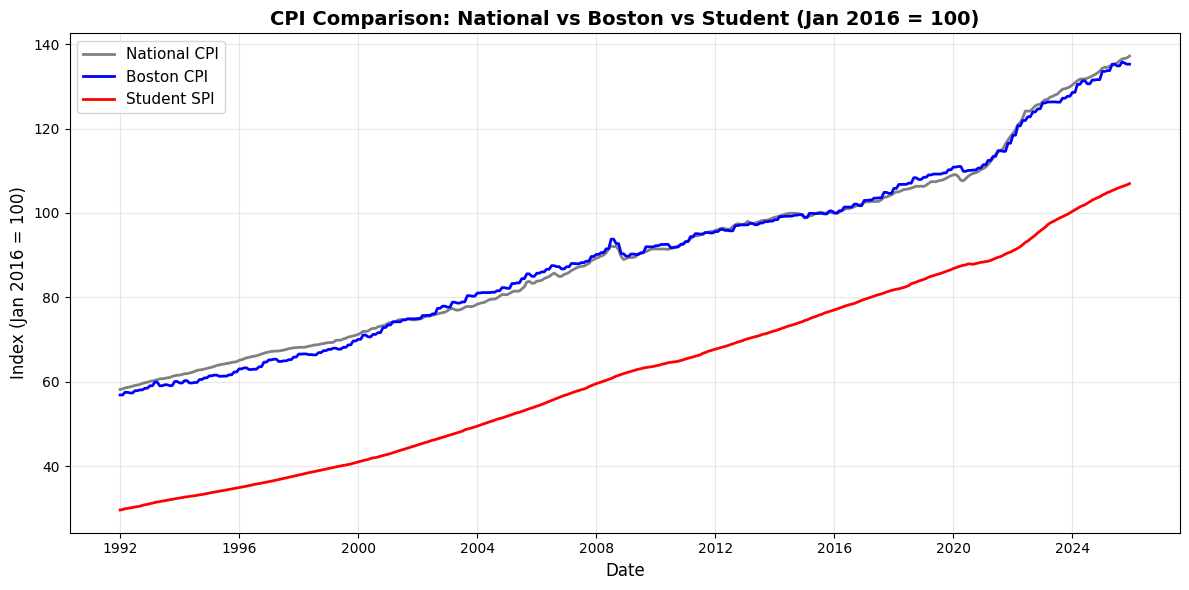


Summary Statistics (as of latest date):
National CPI: 137.19
Boston CPI: 135.25
Student SPI: 106.96


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API (replace with your API key)
fred = Fred(api_key='3e150c3fcd656c5656ed9c32d89a86b9')

# Fetch Boston CPI data
# FRED Series ID: CUURA103SA0 (CPI-U Boston-Cambridge-Newton, All Items)
boston_cpi_raw = fred.get_series('CUURA103SA0')

# Convert to DataFrame
boston_df = pd.DataFrame(boston_cpi_raw, columns=['Boston_CPI_Raw'])

# Re-index to Jan 1, 2016 = 100
start_date = '2016-01-01'
if start_date in boston_df.index:
    base_value = boston_df.loc[start_date, 'Boston_CPI_Raw']
else:
    # Handle if exact date doesn't exist (find closest)
    base_value = boston_df.loc[boston_df.index >= start_date].iloc[0]['Boston_CPI_Raw']

boston_df['Boston_CPI'] = (boston_df['Boston_CPI_Raw'] / base_value) * 100

# Merge with your existing DataFrame (assuming df has a datetime index)
df = df.merge(boston_df[['Boston_CPI']], left_index=True, right_index=True, how='left')

# Handle missing values (forward fill if monthly data has gaps)
df['Boston_CPI'] = df['Boston_CPI'].fillna(method='ffill')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CPI'], color='grey', linewidth=2, label='National CPI')
plt.plot(df.index, df['Boston_CPI'], color='blue', linewidth=2, label='Boston CPI')
plt.plot(df.index, df['Student_SPI'], color='red', linewidth=2, label='Student SPI')

plt.title('CPI Comparison: National vs Boston vs Student (Jan 2016 = 100)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Index (Jan 2016 = 100)', fontsize=12)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display summary statistics
print("\nSummary Statistics (as of latest date):")
print(f"National CPI: {df['CPI'].iloc[-1]:.2f}")
print(f"Boston CPI: {df['Boston_CPI'].iloc[-1]:.2f}")
print(f"Student SPI: {df['Student_SPI'].iloc[-1]:.2f}")